# Figure S2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KernelDensity

%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

# color-blind safe color scheme from https://personal.sron.nl/~pault/#fig:scheme_bright
blue, cyan, green, yellow = "#4477AA", "#66CCEE", "#228833", "#CCBB44"
red, purple, grey, black = "#EE6677", "#AA3377", "#BBBBBB", "#333333"

サンプルIDを割り振る

In [2]:
samples = ["DMSO-Total-1", "DMSO-Total-2", "DMSO-Total-3", "TPG-Total-1", "TPG-Total-2", "TPG-Total-3",
                    "DMSO-P0-1", "DMSO-P0-2", "DMSO-P0-3", "TPG-P0-1", "TPG-P0-2", "TPG-P0-3",
                    "DMSO-L10a-1", "DMSO-L10a-2", "DMSO-L10a-3", "TPG-L10a-1", "TPG-L10a-2", "TPG-L10a-3"]

In [3]:
df1 = pd.read_csv("../slamdunk/csv/allreads.csv", index_col=["Chromosome", "Start", "End", "Name", "Length", "Strand"])
df2 = pd.read_csv("../slamdunk/csv/tcreads.csv", index_col=["Chromosome", "Start", "End", "Name", "Length", "Strand"])

df1.columns = samples
df2.columns = samples

df1.head()

DMSO-Total-1  \
Chromosome Start  End    Name                       Length Strand                 
chr1       70009  71585  OR4F5|ENSG00000186092.7    1576   +                  0   
           944154 944574 SAMD11|ENSG00000187634.13  420    +               1626   
           944203 944693 NOC2L|ENSG00000188976.11   490    -               1354   
           965192 965719 KLHL17|ENSG00000187961.15  527    +                 94   
           974576 975865 PLEKHN1|ENSG00000187583.11 1289   +                 11   

                                                                   DMSO-Total-2  \
Chromosome Start  End    Name                       Length Strand                 
chr1       70009  71585  OR4F5|ENSG00000186092.7    1576   +                  0   
           944154 944574 SAMD11|ENSG00000187634.13  420    +               1174   
           944203 944693 NOC2L|ENSG00000188976.11   490    -               1074   
           965192 965719 KLHL17|ENSG00000187961.15  527    +                 45   
           974576 975865 PLEKHN1|ENSG00000187583.11 1289   +                 10   

                                                                   DMSO-Total-3  \
Chromosome Start  End    Name                       Length Strand                 
chr1       70009  71585  OR4F5|ENSG00000186092.7    1576   +                  0   
           944154 944574 SAMD11|ENSG00000187634.13  420    +               1282   
           944203 944693 NOC2L|ENSG00000188976.11   490    -               1091   
           965192 965719 KLHL17|ENSG00000187961.15  527    +                 77   
           974576 975865 PLEKHN1|ENSG00000187583.11 1289   +                 13   

                                                                   TPG-Total-1  \
Chromosome Start  End    Name                       Length Strand                
chr1       70009  71585  OR4F5|ENSG00000186092.7    1576   +                 0   
           944154 944574 SAMD11|ENSG00000187634.13  420    +              1792   
           944203 944693 NOC2L|ENSG00000188976.11   490    -              1177   
           965192 965719 KLHL17|ENSG00000187961.15  527    +               125   
           974576 975865 PLEKHN1|ENSG00000187583.11 1289   +                 4   

                                                                   TPG-Total-2  \
Chromosome Start  End    Name                       Length Strand                
chr1       70009  71585  OR4F5|ENSG00000186092.7    1576   +                 0   
           944154 944574 SAMD11|ENSG00000187634.13  420    +              1673   
           944203 944693 NOC2L|ENSG00000188976.11   490    -              1088   
           965192 965719 KLHL17|ENSG00000187961.15  527    +               117   
           974576 975865 PLEKHN1|ENSG00000187583.11 1289   +                 0   

                                                                   TPG-Total-3  \
Chromosome Start  End    Name                       Length Strand                
chr1       70009  71585  OR4F5|ENSG00000186092.7    1576   +                 0   
           944154 944574 SAMD11|ENSG00000187634.13  420    +              1543   
           944203 944693 NOC2L|ENSG00000188976.11   490    -              1051   
           965192 965719 KLHL17|ENSG00000187961.15  527    +               144   
           974576 975865 PLEKHN1|ENSG00000187583.11 1289   +                 2   

                                                                   DMSO-P0-1  \
Chromosome Start  End    Name                       Length Strand              
chr1       70009  71585  OR4F5|ENSG00000186092.7    1576   +               0   
           944154 944574 SAMD11|ENSG00000187634.13  420    +            2024   
           944203 944693 NOC2L|ENSG00000188976.11   490    -            1146   
           965192 965719 KLHL17|ENSG00000187961.15  527    +              77   
           974576 975865 PLEKHN1|ENSG00000187583.11 1289   +               0   

                                   

# 全リード数を比較 (bar chart) 

Text(0, 0.5, 'T>C reads (million)')

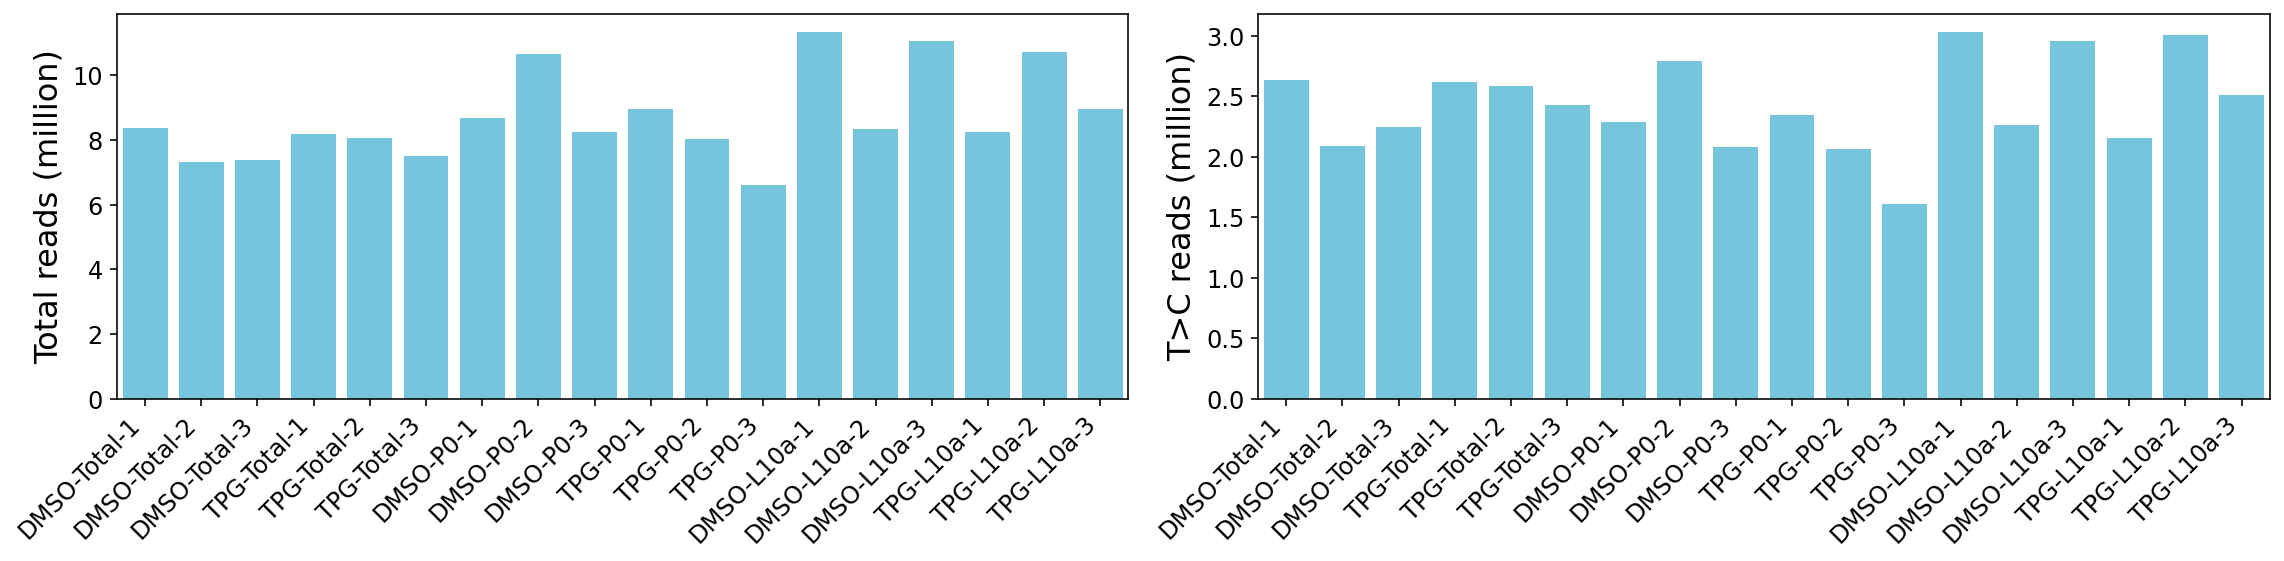

In [4]:
# subplot
fig = plt.figure(figsize=(16, 4), tight_layout=True)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

for df, ax in zip((df1, df2), (ax1, ax2)):
    x = df.columns.values
    y = np.array(df.sum() / 1000000)

    sns.barplot(x=x, y=y, ax=ax, color=cyan)
    fig.autofmt_xdate(rotation=45)
    ax.tick_params(direction="out", labelsize=12)
    
ax1.set_ylabel("Total reads (million)", fontsize=16)
ax2.set_ylabel("T>C reads (million)", fontsize=16)

# fig.savefig("../figure/Barplot_all_reads.pdf", dpi=300)

# CPM正規化
CPM正規化は100万リードあたりのリード数になるよう補正をかける。遺伝子長は考慮されていないが、サンプルのクラスター解析やPCAを行うのであればCPM正規化で十分。QuantSeqは1転写産物あたり1リードできるような系なので発現変動解析もCPM正規化でOK。T>C変換リードは、非変換リードも含めた全リードで正規化する。

In [8]:
# counts per million
def normalized_cpm(df_target, df_used):
    return 10 ** 6 * df_target / df_used.sum()

# 全リードカウントの分布 (distribution) を表示

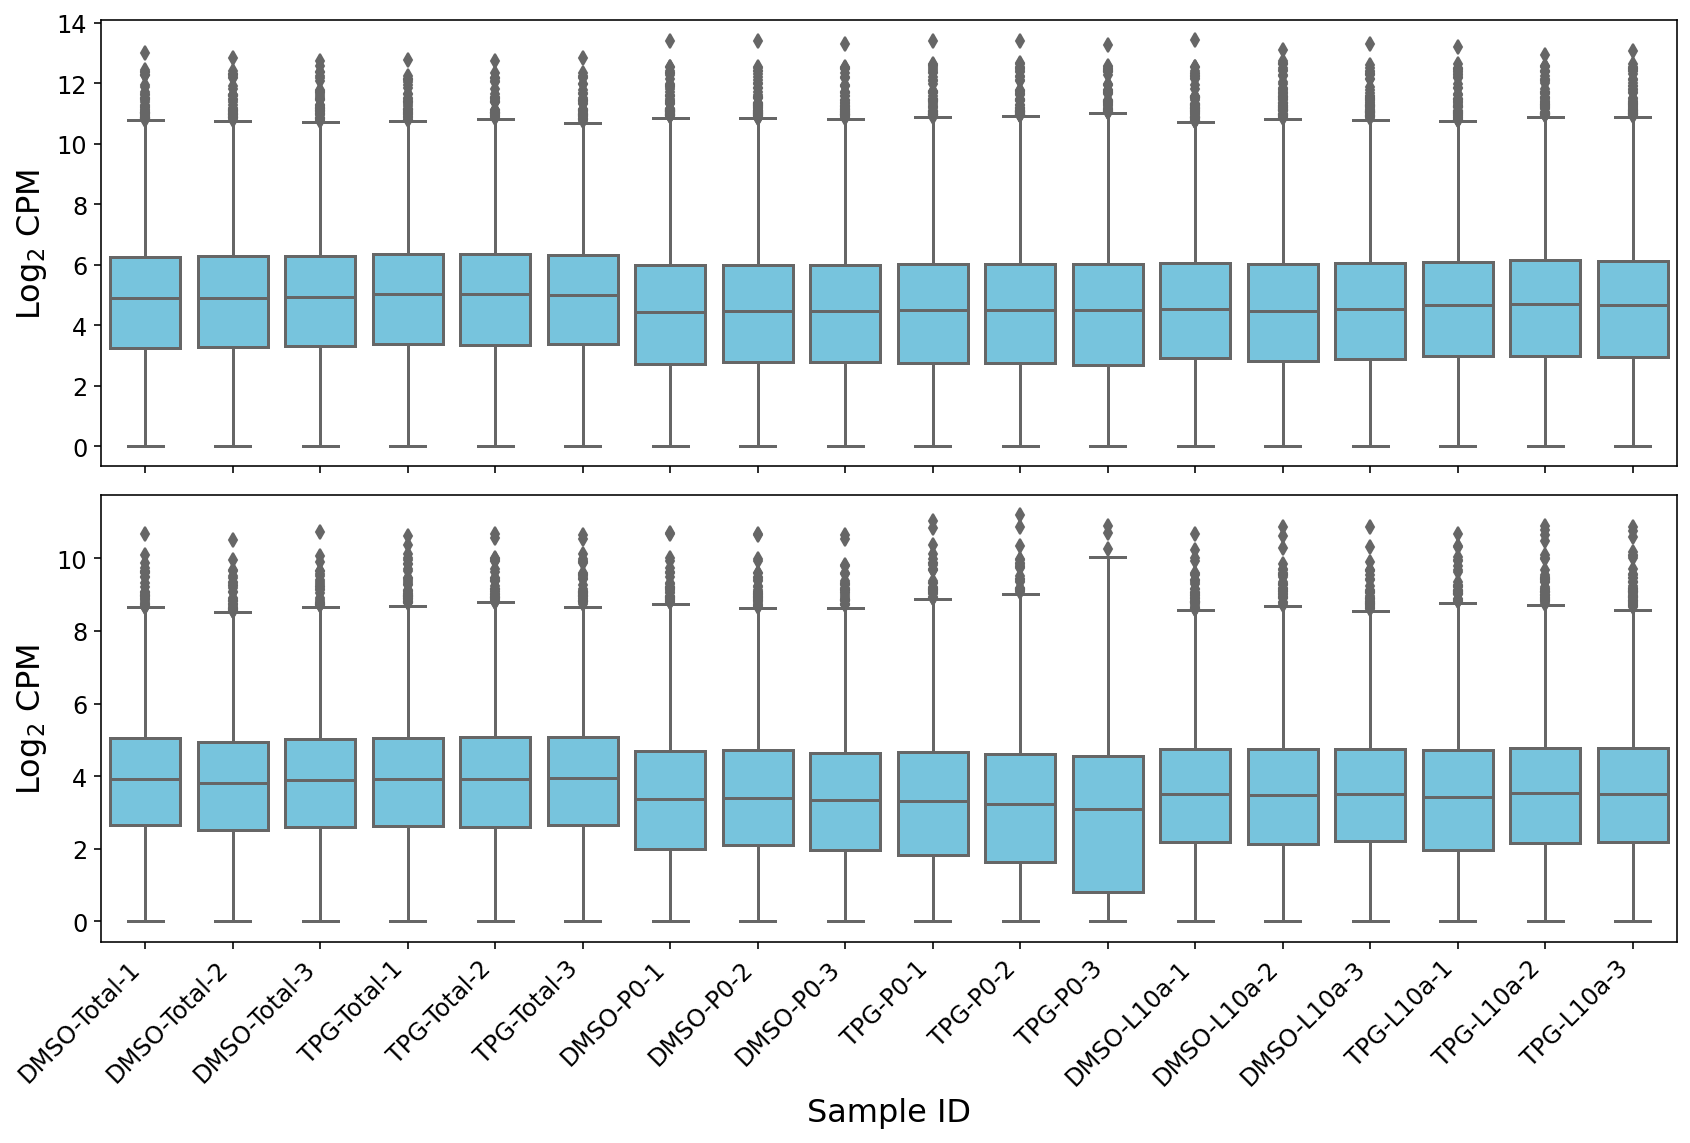

In [18]:
df1_cpm = normalized_cpm(df1, df1)  # CPM正規化
log_df1 = np.log2(df1_cpm + 1)     # 対数変換

df2_cpm = normalized_cpm(df2, df1)  # CPM正規化
log_df2 = np.log2(df2_cpm + 1)     # 対数変換

# subplot
fig = plt.figure(figsize=(12, 8), tight_layout=True)
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

for df, ax in zip((log_df1, log_df2), (ax1, ax2)):
    
    # リードカウントの少ない遺伝子を除外 (box plotのみ)
    min_cpm = 0.5
    log_df_wo_zero = df[df.sum(axis=1) >= min_cpm * len(df.columns)]
    
    ax.tick_params(direction="out", labelsize=12)
    ax.set_xlabel("Sample ID", fontsize=16)
    ax.set_ylabel("Log" + "$_{2}$" + " CPM", fontsize=16)

    sns.boxplot(data=log_df_wo_zero, color="#66CCEE", ax=ax)
    fig.autofmt_xdate(rotation=45)

# fig.savefig("../figure/Boxplot_all_reads.pdf", dpi=300)

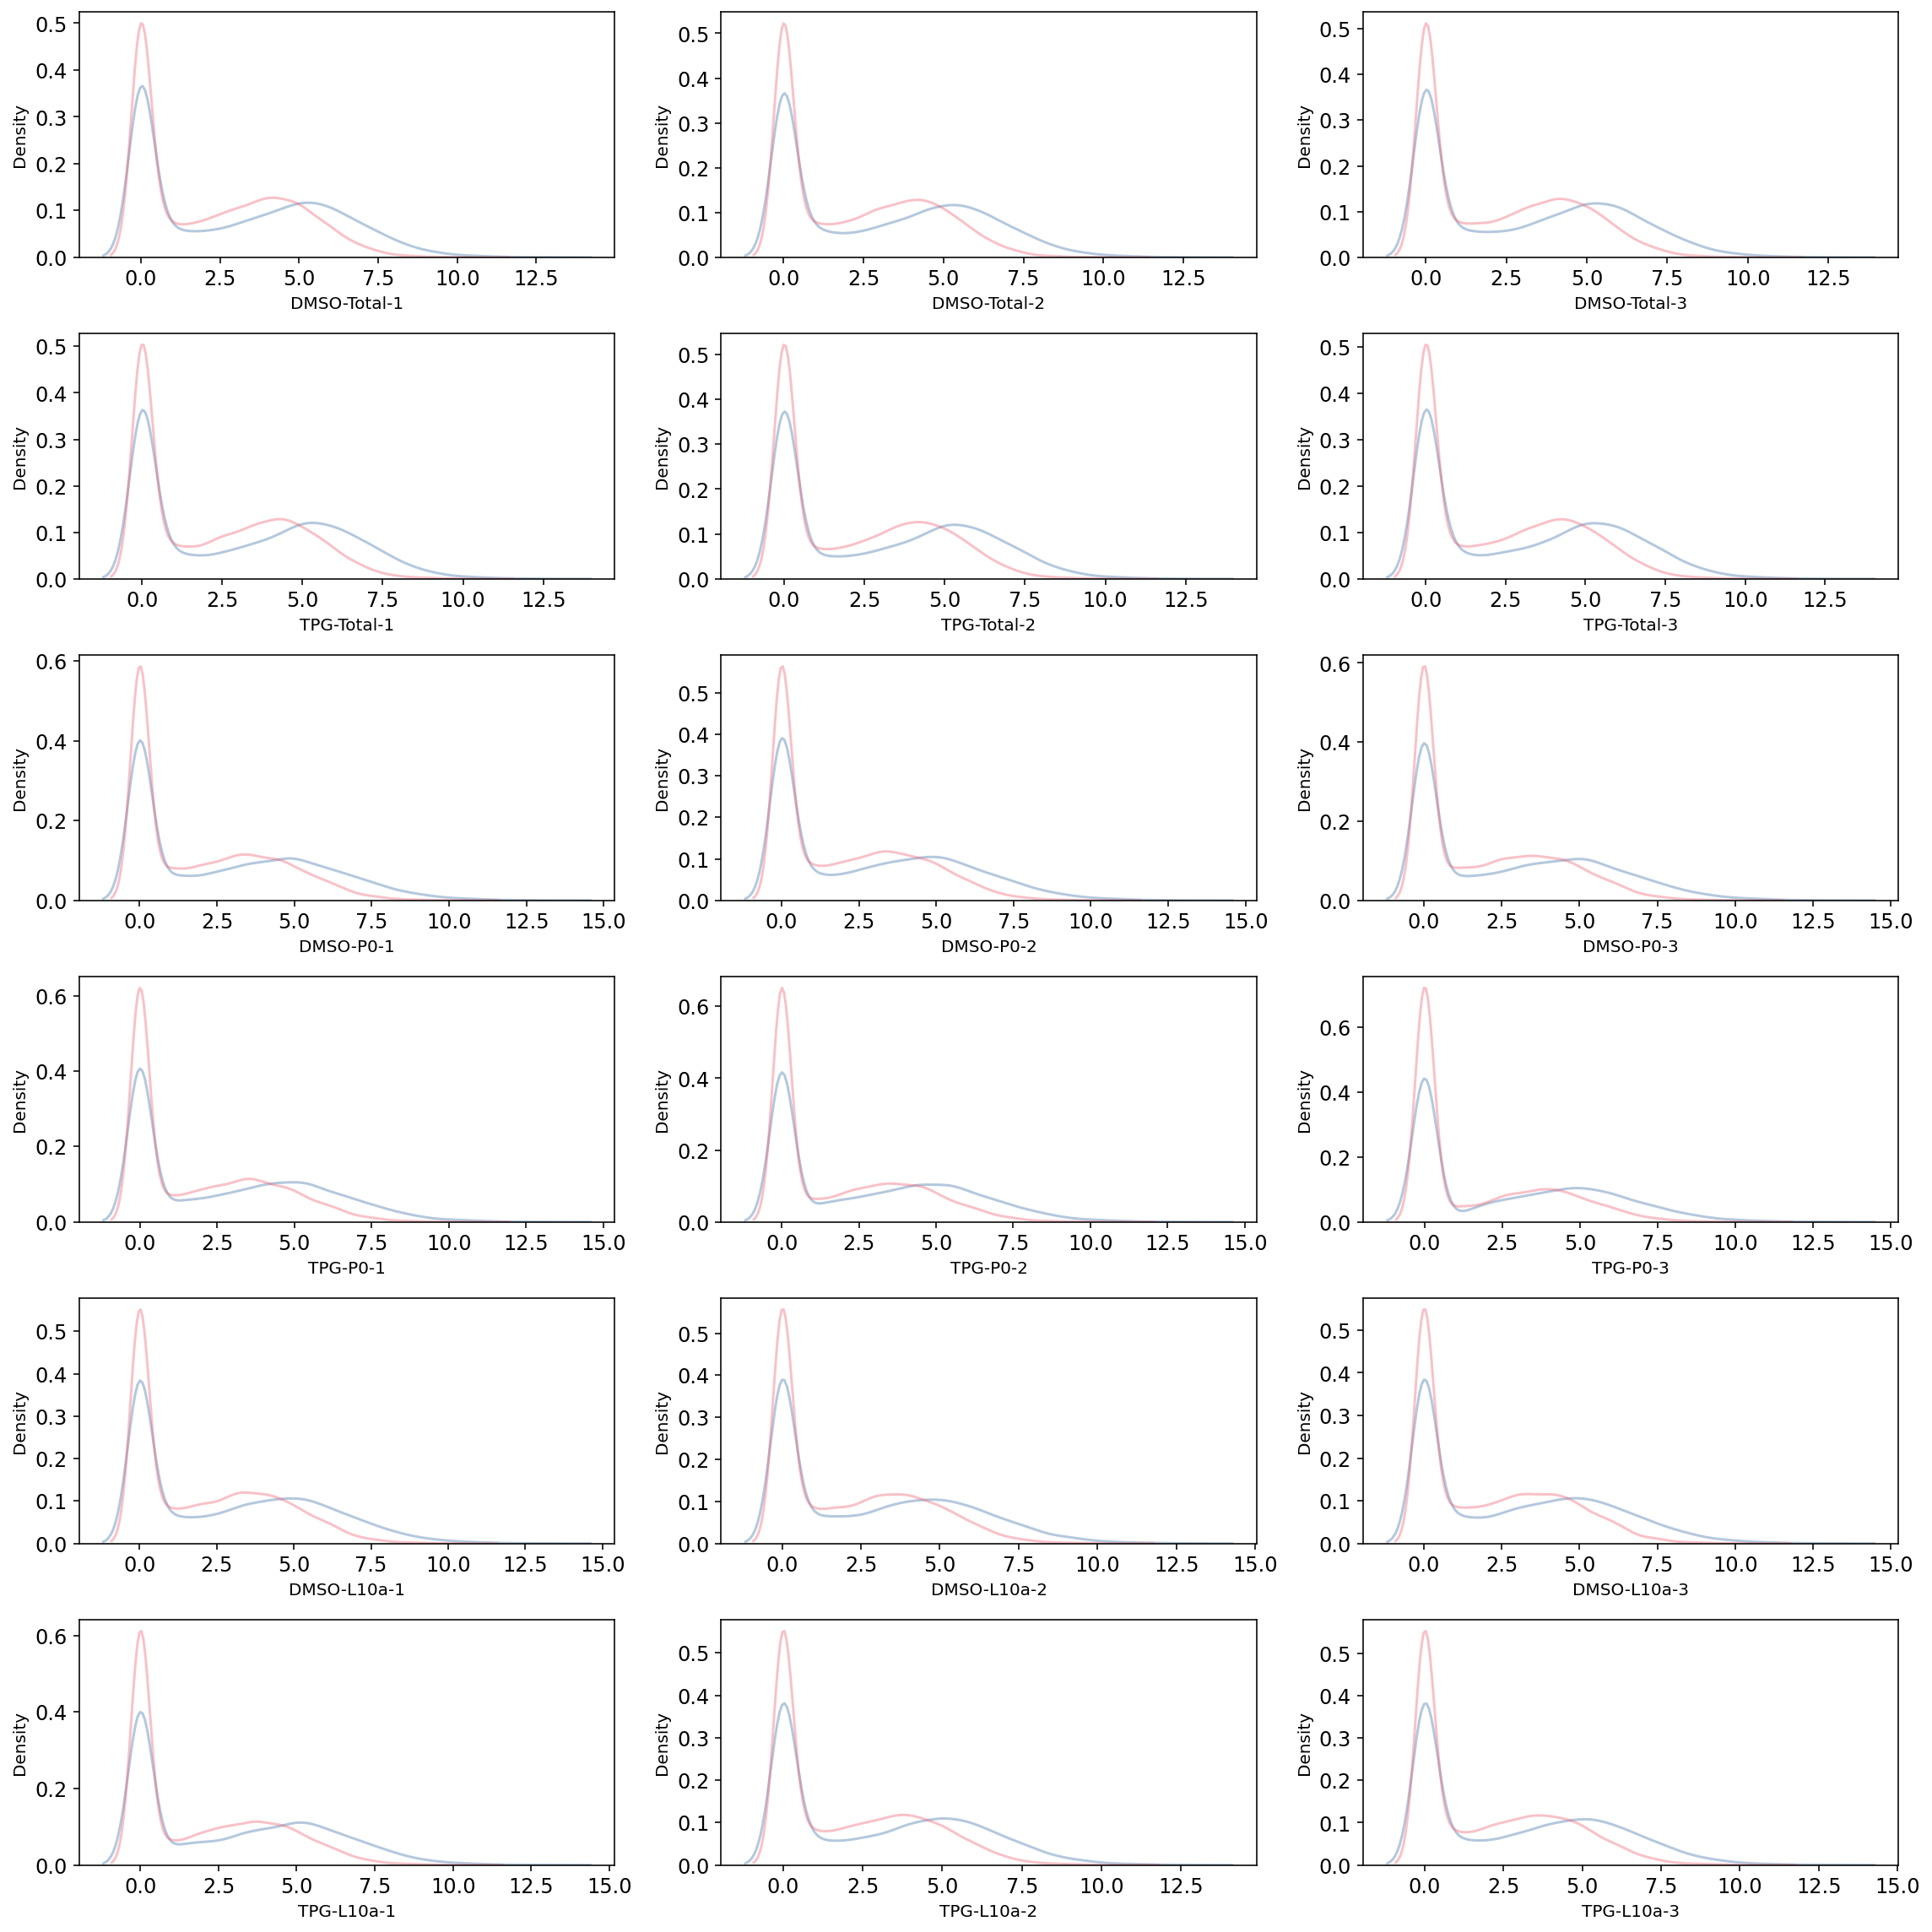

In [24]:
fig, axs = plt.subplots(6, 3, figsize=(16, 16),  tight_layout=True)
ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16, ax17, ax18= axs.flatten()

for sample, ax in zip((samples), (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16, ax17, ax18)):
    ax.tick_params(direction="out", labelsize=12)
    sns.kdeplot(log_df1[sample], ax=ax, color=blue, alpha=0.4)
    sns.kdeplot(log_df2[sample], ax=ax, color=red, alpha=0.4)

# fig.savefig("../figure/Densityplot_all_reads.pdf", dpi=300)

# 主成分分析 (PCA)
参考 (https://qiita.com/oki_kosuke/items/43cb63134f9a03ebc79a)

In [25]:
# 解析に含める上位の値を設定
top = 1000

# 偏差の情報を付与
pca_df = log_df1.copy()
pca_df["Variance"] = pca_df.var(axis=1)
pca_df = pca_df.sort_values("Variance", ascending=False)

# 偏差の値が上位の遺伝子を抽出
pca_df  = pca_df .iloc[:top, :-1]

# テーブルの転置
pca_df = pca_df.T

# 主成分分析で求める次元数
pca_number = len(sample)

#主成分分析実行
pca = PCA(n_components=pca_number, whiten=False)
pca.fit(pca_df)

# データを主成分空間に写像
feature = pca.transform(pca_df)

ft = pd.DataFrame(feature, index=pca_df.index, columns=["PC{}".format(i + 1) for i in range(0, pca_number)])

cumulative_sum = np.cumsum(pca.explained_variance_ratio_).tolist()
pc1 = round(pca.explained_variance_ratio_.tolist()[0] * 100, 2)
pc2 = round(pca.explained_variance_ratio_.tolist()[1] * 100, 2)

/Users/himai/miniconda3/envs/basic/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/himai/miniconda3/envs/basic/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


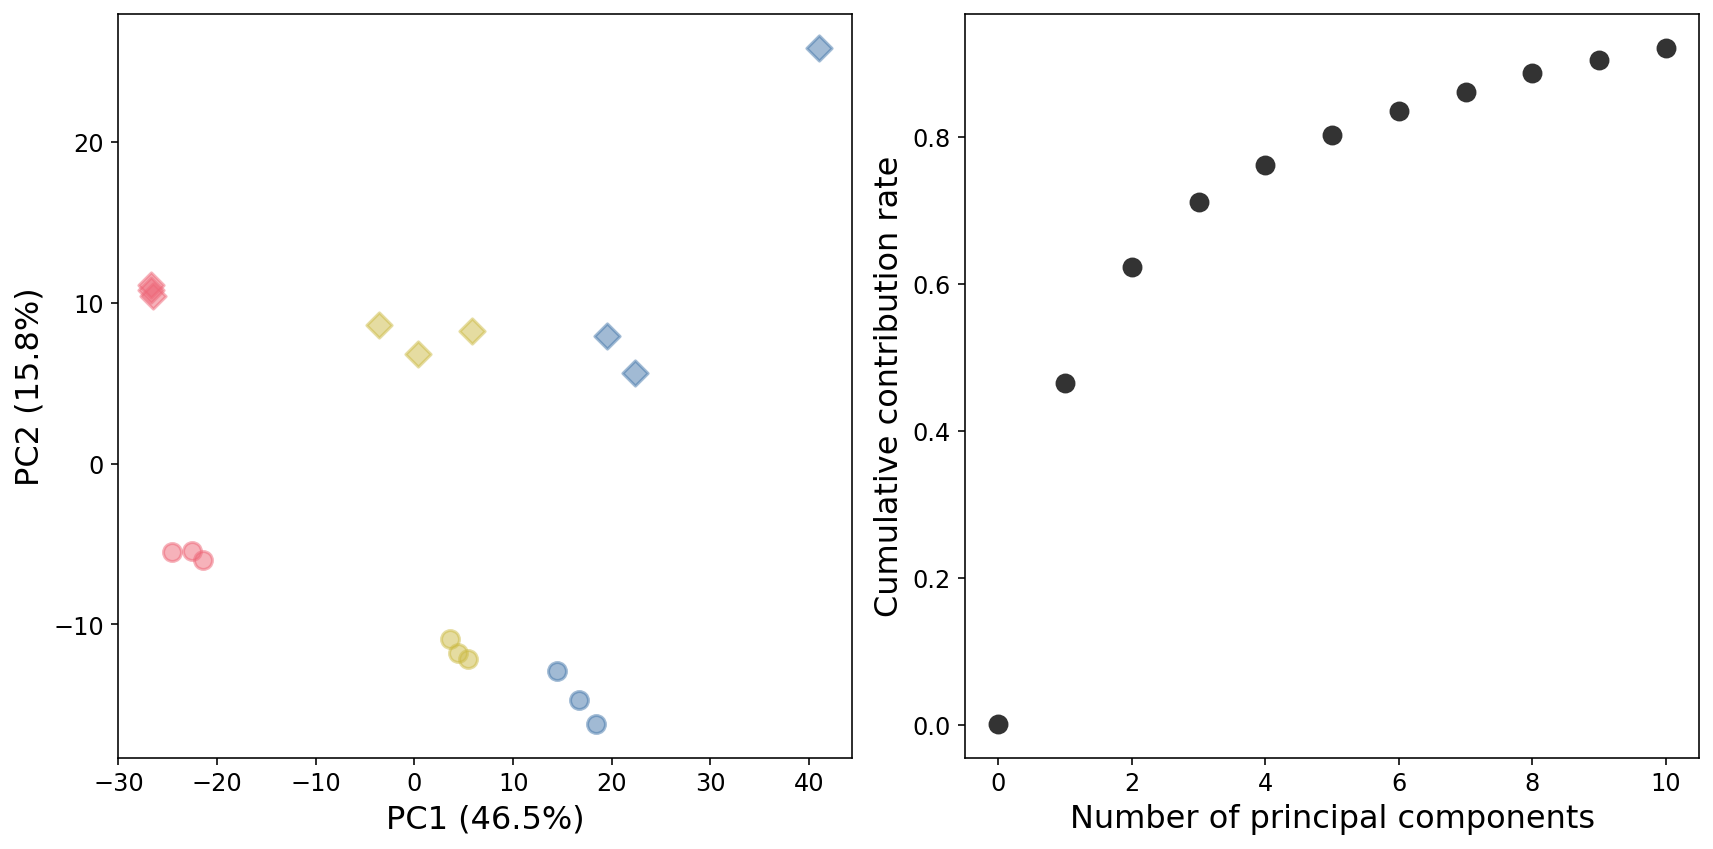

In [26]:
# subplot
fig = plt.figure(figsize=(12, 6), tight_layout=True)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

sample_list = df.columns.values
cumulative_sum = np.cumsum(pca.explained_variance_ratio_).tolist()

for i in sample_list.tolist():
    
    if "DMSO" in i:
        marker = "o"
    elif "TPG" in i:
        marker = "D"
        
    if "Total" in i:
        color = red
    elif "P0" in i:
        color = blue
    else:
        color = yellow
    
    ax1.scatter(ft[i:i]["PC1"], ft[i:i]["PC2"], color=color, marker=marker, alpha=0.5,  linewidths=1.5, s=80)

for i in range(0, len(cumulative_sum)):   
    ax2.scatter(i + 1, cumulative_sum[i], color="#333333", marker="o", s=80)

pc1 = round(pca.explained_variance_ratio_[0] * 100, 1)
pc2 = round(pca.explained_variance_ratio_[1] * 100, 1)
 
ax1.tick_params(direction="out", labelsize=12)
ax1.set_xlabel(f"PC1 ({pc1}%)", fontsize=16)
ax1.set_ylabel(f"PC2 ({pc2}%)", fontsize=16)

ax2.scatter(0, 0.001, color="#333333", marker="o", s=80)

ax2.tick_params(direction="out", labelsize=12)
ax2.set_xlabel("Number of principal components", fontsize=16)
ax2.set_ylabel("Cumulative contribution rate", fontsize=16)

fig.savefig("../results/figure_S2/PCA_ReadCount.pdf", dpi=300)

In [27]:
# 解析に含める上位の値を設定
top = 1000

# 偏差の情報を付与
pca_df = log_df2.copy()
pca_df["Variance"] = pca_df.var(axis=1)
pca_df = pca_df.sort_values("Variance", ascending=False)

# 偏差の値が上位の遺伝子を抽出
pca_df  = pca_df .iloc[:top, :-1]

# テーブルの転置
pca_df = pca_df.T

# 主成分分析で求める次元数
pca_number = len(sample)

#主成分分析実行
pca = PCA(n_components=pca_number, whiten=False)
pca.fit(pca_df)

# データを主成分空間に写像
feature = pca.transform(pca_df)

ft = pd.DataFrame(feature, index=pca_df.index, columns=["PC{}".format(i + 1) for i in range(0, pca_number)])

cumulative_sum = np.cumsum(pca.explained_variance_ratio_).tolist()
pc1 = round(pca.explained_variance_ratio_.tolist()[0] * 100, 2)
pc2 = round(pca.explained_variance_ratio_.tolist()[1] * 100, 2)

/Users/himai/miniconda3/envs/basic/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/himai/miniconda3/envs/basic/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


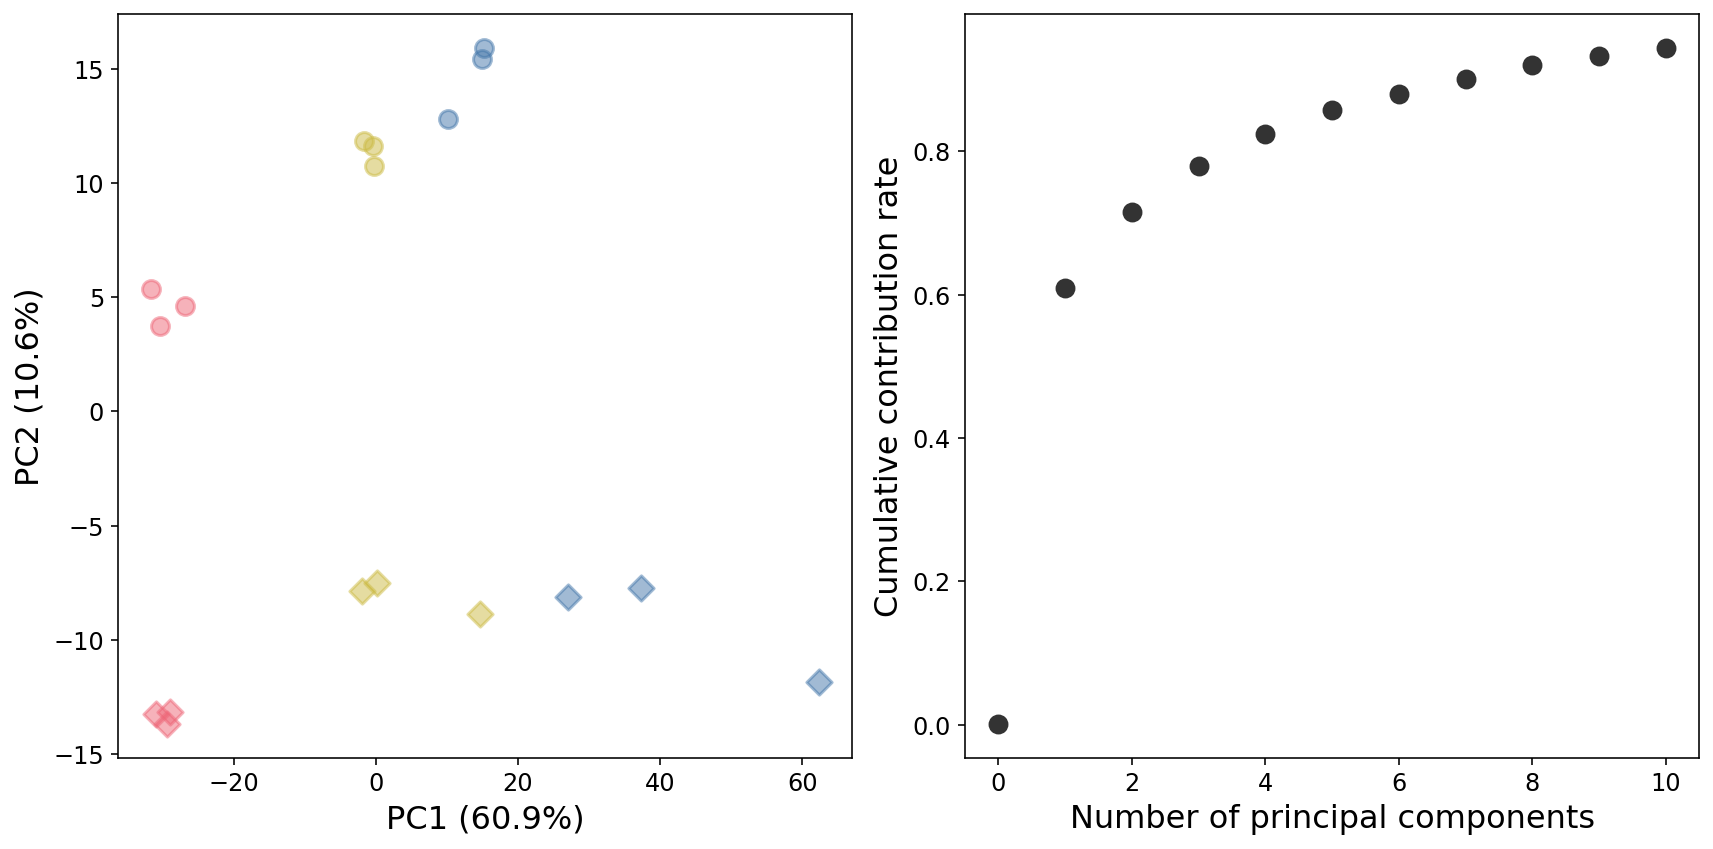

In [28]:
# subplot
fig = plt.figure(figsize=(12, 6), tight_layout=True)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

sample_list = df.columns.values
cumulative_sum = np.cumsum(pca.explained_variance_ratio_).tolist()

for i in sample_list.tolist():
    
    if "DMSO" in i:
        marker = "o"
    elif "TPG" in i:
        marker = "D"
        
    if "Total" in i:
        color = red
    elif "P0" in i:
        color = blue
    else:
        color = yellow
    
    ax1.scatter(ft[i:i]["PC1"], ft[i:i]["PC2"], color=color, marker=marker, alpha=0.5,  linewidths=1.5, s=80)

for i in range(0, len(cumulative_sum)):   
    ax2.scatter(i + 1, cumulative_sum[i], color="#333333", marker="o", s=80)

pc1 = round(pca.explained_variance_ratio_[0] * 100, 1)
pc2 = round(pca.explained_variance_ratio_[1] * 100, 1)
 
ax1.tick_params(direction="out", labelsize=12)
ax1.set_xlabel(f"PC1 ({pc1}%)", fontsize=16)
ax1.set_ylabel(f"PC2 ({pc2}%)", fontsize=16)

ax2.scatter(0, 0.001, color="#333333", marker="o", s=80)

ax2.tick_params(direction="out", labelsize=12)
ax2.set_xlabel("Number of principal components", fontsize=16)
ax2.set_ylabel("Cumulative contribution rate", fontsize=16)

fig.savefig("../results/figure_S2/PCA_TcReadCount.pdf", dpi=300)